In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import time

Hypothesis: The area where people pay more city taxes in property will have more pre-approved credit applicants.
 

Data Source1: https://data.baltimorecity.gov/Financial/Real-Property-Taxes/27w9-urtv/data This data resembles the property taxes that people of different zipcodes pay. I have selected City taxes to compare. 

The columns and rows in this datasets are 19 and 238135 respectively.

In [ ]:
#loading the data
propertytaxes_df =pd.read_csv("https://data.baltimorecity.gov/api/views/27w9-urtv/rows.csv?accessType=DOWNLOAD")
propertytaxes_df.head()

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,0325023,0325,023,14,30,1901 LINDEN AVE,0.033 ACRES,4246.47,211.57,NOT A PRINCIPAL RESIDENCE,2045.81,10/15/2019,Bolton Hill,Central,11.0,"(39.30984989, -76.63092357)",21.0,99.0,27301.0
1,3844100,3844,100,12,170,343 E 28TH ST,16X85,1094.78,54.54,NOT A PRINCIPAL RESIDENCE,1294.02,02/29/2020,Harwood,Northern,12.0,"(39.32194481, -76.61133401)",98.0,33.0,27307.0
2,0511024,0511,024,11,20,13 - 15 W EAGER ST,0.140 ACRES,19060.79,949.65,NOT A PRINCIPAL RESIDENCE,10464.99,02/01/2020,Mid-Town Belvedere,Central,11.0,"(39.30074569, -76.61697244)",151.0,93.0,13642.0
3,3845006H,3845,006H,12,170,437 E 28TH ST,15X85-6,899.20,44.80,NOT A PRINCIPAL RESIDENCE,1054.58,02/29/2020,Harwood,Northern,12.0,"(39.32194511, -76.61002851)",98.0,33.0,27307.0
4,3847023,3847,023,12,170,310 E 28TH ST,15-4X85,2589.70,129.02,PRINCIPAL RESIDENCE,2317.80,02/29/2020,Harwood,Northern,12.0,"(39.32232093, -76.61225729)",98.0,33.0,27307.0


In [ ]:
#checking about outliers and knowing mpre about the dataset.
propertytaxes_df.describe()

,Ward,Sect,CityTax,StateTax,AmountDue,CouncilDistrict,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
count,238135.000000,238135.000000,2.193330e+05,219534.000000,1.648560e+05,222051.000000,222024.000000,221798.000000,222063.000000
mean,18.668864,145.150062,4.150850e+03,210.060009,3.132867e+03,7.590765,131.938250,146.150853,24488.046176
std,8.199666,134.000118,3.751563e+04,1927.446042,2.720699e+04,4.043910,83.664427,82.520758,5726.110336
min,1.000000,0.000000,2.250000e+00,0.110000,1.000000e-02,1.000000,1.000000,1.000000,13642.000000
25%,12.000000,50.000000,8.092800e+02,40.320000,7.063400e+02,4.000000,54.000000,75.000000,26956.000000
50%,20.000000,110.000000,2.378380e+03,118.610000,1.496995e+03,8.000000,122.000000,151.000000,27301.000000
75%,27.000000,200.000000,3.715940e+03,185.130000,2.786230e+03,11.000000,210.000000,214.000000,27935.000000
max,50.000000,690.000000,6.276443e+06,312705.340000,4.481095e+06,14.000000,278.000000,290.000000,28570.000000


In [ ]:
#checking if there are any null values so we can drop them.
propertytaxes_df.isnull().sum()

PropertyID                         0
Block                              0
Lot                                0
Ward                               0
Sect                               0
PropertyAddress                    5
LotSize                            0
CityTax                        18802
StateTax                       18601
ResCode                            0
AmountDue                      73279
AsOfDate                           0
Neighborhood                   16112
PoliceDistrict                 16112
CouncilDistrict                16084
Location                       16072
2010 Census Neighborhoods      16111
2010 Census Wards Precincts    16337
Zip Codes                      16072
dtype: int64

The zip code column of the dataframe had missing values. But as I am going to compare the city tax per zip code if there is no zipcode then that row is not useful for the hypothesis. But later the other values in the same rows might be useful. Therefore I have not dropped the missing values and have kept them as it is. 

Selecting the location of the columns necessary and storing them as a new data frame. Then grouping them by zipcodes and calculating mean values of city taxes in each Zipcodes. Reseting the index.


In [ ]:
new_df=propertytaxes_df.loc[:, ["Zip Codes", "CityTax"]]
new_df = new_df.groupby('Zip Codes').mean().reset_index()
#Converting the Zip Codes to integer as its value was coming in float.
new_df['Zip Codes']=new_df['Zip Codes'].astype(int) 

In [ ]:
new_df.head()

,Zip Codes,CityTax
0,13642,15564.248050
1,13645,16976.717937
2,13987,2498.055235
3,13991,3288.764465
4,13995,3569.498716


In [ ]:
new_df.isnull().sum()

Zip Codes    0
CityTax      1
dtype: int64

In [ ]:
propertytaxes_df.groupby("Zip Codes").count().head()

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts
Zip Codes,,,,,,,,,,,,,,,,,,
13642.0,3137,3137,3137,3137,3137,3137,3137,2251,2257,3137,1682,3137,3137,3137,3137,3137,3137,3137
13645.0,4893,4893,4893,4893,4893,4893,4893,3466,3472,4893,2113,4893,4891,4891,4893,4893,4891,4891
13987.0,5691,5691,5691,5691,5691,5691,5691,4949,4963,5691,2442,5691,5691,5691,5691,5691,5691,5691
13991.0,12058,12058,12058,12058,12058,12058,12058,11784,11787,12058,10953,12058,12055,12055,12055,12058,12055,12028
13995.0,3809,3809,3809,3809,3809,3809,3809,3636,3636,3809,2658,3809,3809,3809,3809,3809,3809,3801


Here by using groupby.count() we can check the number of property ids in a particular zipcode or number of ids used to pay property taxes in an individual zipcode.
 

#Second Data: People having preliminary approval according to zipcodes.
Source- https://data.baltimorecity.gov/Financial/Historic-Tax-Credit-Applicants-Given-Preliminary-A/iub8-xy78/data


The number of columns and rows in this data set are 11 and 175 respectively.

In [ ]:
approvedapplicants_df = pd.read_csv("https://data.baltimorecity.gov/api/views/iub8-xy78/rows.csv?accessType=DOWNLOAD")
approvedapplicants_df

,Property Address,Zip Code,Historic District,District Type,Application Date,Preliminary Approval,Final Certification,Location 1,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,142 W. Lanvale Street,21217,Bolton Hill,Local & National District,01/15/2010,01/26/2010,01/14/2011,"142 Lanvale Street\nBaltimore, MD\n(39.308851,...",95,158,13645
1,1125 St. Paul St,0,Mount Vernon,Local & National District,08/26/2010,08/31/2010,NaN,"1125 St Paul St\nBaltimore, MD\n(39.303253, -7...",151,97,13645
2,805 N. Calhoun St,0,Old West Baltimore,National District,05/19/2010,06/03/2010,NaN,"805 Calhoun St\nBaltimore, MD\n(39.297831, -76...",106,53,27301
3,646 S. Decker Avenue,21224,Canton,National District,03/24/2010,03/29/2010,04/14/2011,"646 Decker Avenue\nBaltimore, MD\n(39.299122, ...",78,124,13987
4,2211 Gough Street,21231,Upper Fell's Point,National District,09/13/2010,10/01/2010,05/11/2011,"2211 Gough Street\nBaltimore, MD\n(39.287956, ...",240,117,27954
...,...,...,...,...,...,...,...,...,...,...,...
170,2105 Bank Street,21231,Upper Fell's Point,National District,06/02/2010,06/03/2010,03/17/2011,"2105 Bank Street\nBaltimore, MD\n(39.286876, -...",240,117,27954
171,927 N. Calvert St,0,Mount Vernon,Local & National District,02/19/2010,02/25/2010,NaN,"927 Calvert St\nBaltimore, MD\n(39.294287, -76...",65,6,13645
172,2553 Madison Avenue,0,"Eutaw/Madison, Reservoir Hill",Local & National District,12/07/2010,12/29/2010,NaN,"2553 Madison Avenue\nBaltimore, MD\n(39.314683...",210,18,27301
173,2125 McCulloh St,0,Old West Baltimore,National District,12/21/2009,01/06/2010,NaN,"2125 McCulloh St\nBaltimore, MD\n(39.309018, -...",66,98,27301


In [ ]:
approvedapplicants_df.describe()

,Zip Code,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
count,175.000000,175.000000,175.000000,175.000000
mean,11397.942857,126.057143,108.965714,22778.331429
std,10610.834246,73.049953,67.683331,6555.318333
min,0.000000,9.000000,6.000000,13642.000000
25%,0.000000,65.000000,53.000000,13987.000000
50%,21205.000000,114.000000,121.000000,27295.000000
75%,21224.000000,180.000000,130.000000,27935.000000
max,21231.000000,278.000000,287.000000,27954.000000


Grouping the zipcodes and preliminary approved applicants and showing their count. Then storing them in a new data frame.Reseting the index values.

In [ ]:
new_df2 = approvedapplicants_df[["Zip Codes", "Preliminary Approval"]].groupby("Zip Codes").count().reset_index()

In [ ]:
new_df2.head()

,Zip Codes,Preliminary Approval
0,13642,3
1,13645,21
2,13987,32
3,14004,2
4,14009,3


Merging both the data frames with an inner joint so the NaN values disappear and we can finally compare.

In [ ]:
final_df = pd.merge(new_df,new_df2,on='Zip Codes')
final_df.columns=['Zip Codes','City Tax', 'Count of Preliminary Approval']
final_df.head()

,Zip Codes,City Tax,Count of Preliminary Approval
0,13642,15564.248050,3
1,13645,16976.717937,21
2,13987,2498.055235,32
3,14004,11578.520853,2
4,14009,4383.403164,3


Plotting a scatter plot to compare the CityTax and count of Preliminary Approval credit applicants to prove the (In)Validation of the Hypothesis.

Text(0.5, 1.0, 'City Tax vs Count of Preliminary Approvals')

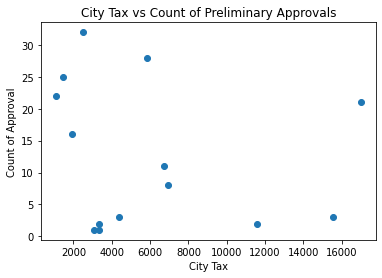

In [ ]:
plt.scatter(x = 'City Tax', y='Count of Preliminary Approval', data=final_df)
plt.xlabel('City Tax')
plt.ylabel('Count of Approval')
plt.title('City Tax vs Count of Preliminary Approvals')
plt.show()

# (In) Validation of Hypothesis.
It is evident from the plot that there is nolinear relationship between the amount of tax and the chances of getting pre-approval credits. Thus the hypothesis is Invalid.

Plotting boxplot to show the quartile values of the mean values of property taxes according to their zipcodes.


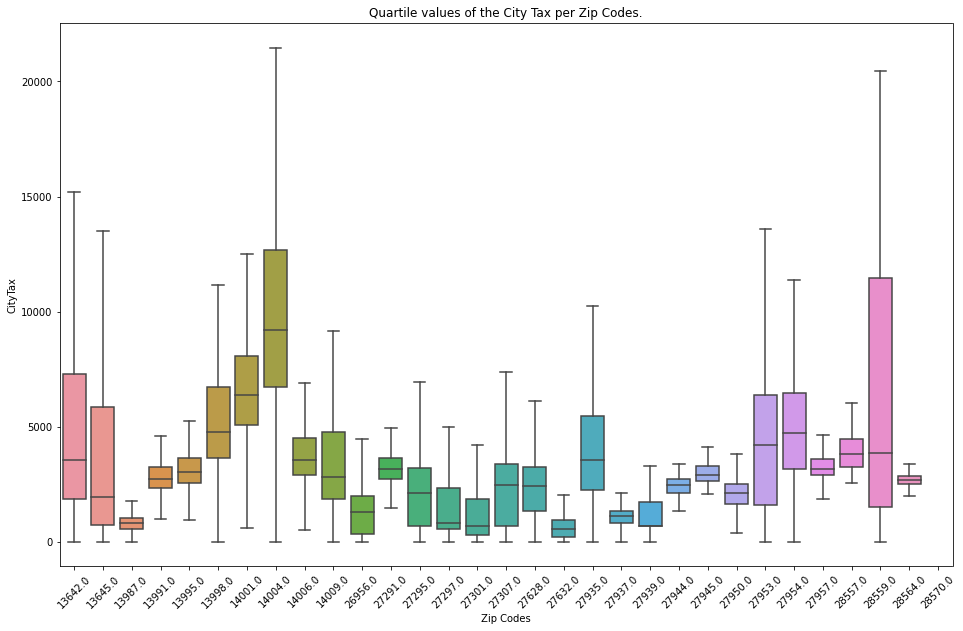

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x='Zip Codes', y='CityTax', data=propertytaxes_df, showfliers=False)
plt.xticks(rotation=45)
plt.title('Quartile values of the City Tax per Zip Codes.')
plt.show()

References
1. https://seaborn.pydata.org/generated/seaborn.boxplot.html
2. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
3. https://data.baltimorecity.gov/
4. https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78
